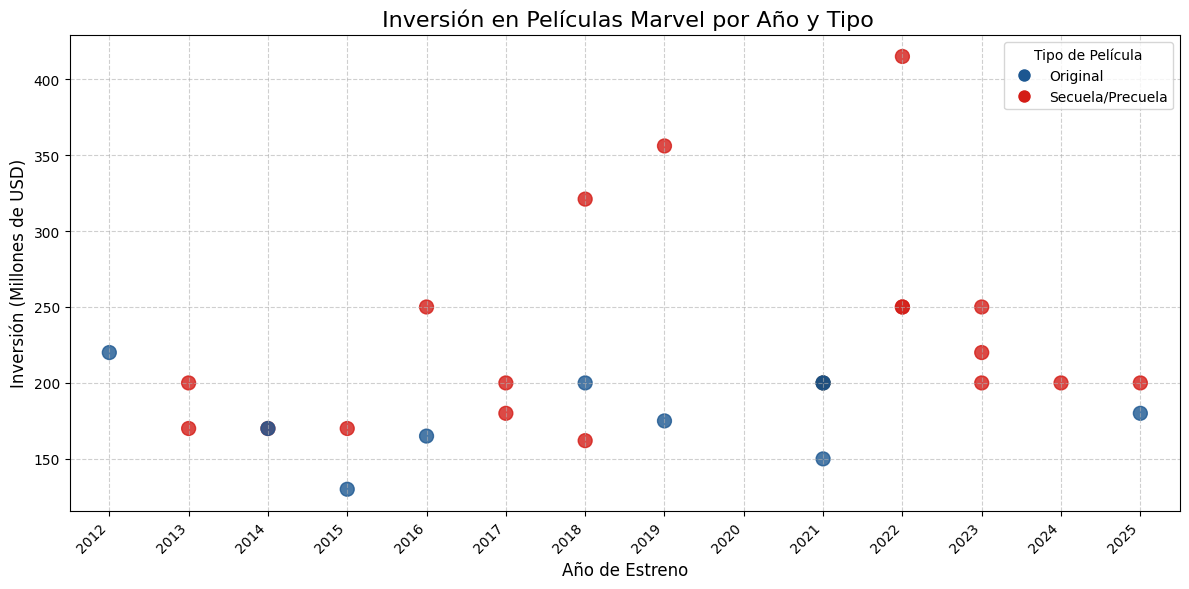

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('Marvel_inversión.csv', sep=';')


df.columns = ['Titulo', 'Anio_Estreno', 'Tipo', 'Inversion', 'Columna_Vacia', 'Columna_Extra']


df = df.dropna(subset=['Anio_Estreno', 'Tipo', 'Inversion'])
df = df.iloc[:-1]


try:
    df['Inversion'] = df['Inversion'].astype(float)
except ValueError:
    df['Inversion'] = df['Inversion'].str.replace('.', '', regex=False).astype(float)


df['Anio_Estreno'] = df['Anio_Estreno'].astype(int)





df['Tipo_Limpio'] = df['Tipo'].str.strip()


color_map_corregido = {
    'Original': '#1c5791',
    'Secuela': '#D41C16',
    'Secuela/Precuela': '#D41C16'
}



df['Color'] = df['Tipo_Limpio'].map(color_map_corregido).fillna('#000000')



plt.figure(figsize=(12, 6))

scatter = plt.scatter(
    df['Anio_Estreno'],
    df['Inversion'] / 1_000_000,
    c=df['Color'],
    s=100,
    alpha=0.8
)



plt.title(' Inversión en Películas Marvel por Año y Tipo', fontsize=16)
plt.xlabel('Año de Estreno', fontsize=12)
plt.ylabel('Inversión (Millones de USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)




min_year = df['Anio_Estreno'].min()
max_year = df['Anio_Estreno'].max()


plt.xticks(np.arange(min_year, max_year + 1), rotation=45, ha='right')

plt.xlim(min_year - 0.5, max_year + 0.5)


legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Original',
               markerfacecolor='#1c5791', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Secuela/Precuela',
               markerfacecolor='#D41C16', markersize=10)
]
plt.legend(handles=legend_elements, title='Tipo de Película')

plt.tight_layout()
plt.show()